<a href="https://colab.research.google.com/github/iishipatel/customNER-forHomeAutomation/blob/main/prism_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy

     |████████████████████████████████| 12.8MB 335kB/s 
     |████████████████████████████████| 1.1MB 41.2MB/s 
     |████████████████████████████████| 460kB 41.5MB/s 
     |████████████████████████████████| 9.1MB 27.6MB/s 
     |████████████████████████████████| 122kB 50.2MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=f2e42e1c8800a320cb0d187ef7ed23e6e22c46089ec70388a5326f07aa129288
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: smart-open 4.2.0
    Uninstalling smart-open-4.2.0:
      Successfully uninstalled smart-open-4.2.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    U

In [ ]:
!python -m spacy download en

2021-03-17 06:05:54.422742: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.7MB 304kB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import json
import logging
import sys

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/MyDrive/Samsung-Prism/ner-dataset.csv"

In [ ]:
def tsv_to_json_format(input_path,output_path,unknown_label):
    try:
        f=open(input_path,'r') # input file
        fp=open(output_path, 'w') # output file
        data_dict={}
        annotations =[]
        label_dict={}
        s=''
        start=0
        for line in f:
            if line[0:len(line)-1]!='.	0':
                word,entity=line.split('\t')
                s+=word+" "
                entity=entity[:len(entity)-1]
                if entity!=unknown_label:
                    if len(entity) != 1:
                        d={}
                        d['text']=word
                        d['start']=start
                        d['end']=start+len(word)-1  
                        try:
                            label_dict[entity].append(d)
                        except:
                            label_dict[entity]=[]
                            label_dict[entity].append(d) 
                start+=len(word)+1
            else:
                data_dict['content']=s
                s=''
                label_list=[]
                for ents in list(label_dict.keys()):
                    for i in range(len(label_dict[ents])):
                        if(label_dict[ents][i]['text']!=''):
                            l=[ents,label_dict[ents][i]]
                            for j in range(i+1,len(label_dict[ents])): 
                                if(label_dict[ents][i]['text']==label_dict[ents][j]['text']):  
                                    di={}
                                    di['start']=label_dict[ents][j]['start']
                                    di['end']=label_dict[ents][j]['end']
                                    di['text']=label_dict[ents][i]['text']
                                    l.append(di)
                                    label_dict[ents][j]['text']=''
                            label_list.append(l)                         
                            
                for entities in label_list:
                    label={}
                    label['label']=[entities[0]]
                    label['points']=entities[1:]
                    annotations.append(label)
                data_dict['annotation']=annotations
                annotations=[]
                json.dump(data_dict, fp)
                fp.write('\n')
                data_dict={}
                start=0
                label_dict={}
    except Exception as e:
        logging.exception("Unable to process file" + "\n" + "error = " + str(e))
        return None

In [ ]:
tsv_to_json_format("/content/gdrive/MyDrive/Samsung-Prism/ner-dataset.tsv",'/content/gdrive/MyDrive/Samsung-Prism/ner_dataset.json','abc')

turn	B-action
on	B-state
AC	B-device
in	0
the	0
bedroom	B-room
.	0
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}], ['B-device', {'text': 'AC', 'start': 8, 'end': 9}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}], ['B-device', {'text': 'AC', 'start': 8, 'end': 9}], ['B-room', {'text': 'bedroom', 'start': 18, 'end': 24}]]
turn	B-action
off	B-state
UPS	B-device
in	0
the	0
livingroom	B-room
.	0
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'off', 'start': 5, 'end': 7}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'off', 'start': 5, 'end': 7}], ['B-device', {'text': 'UPS', 'start': 9, 'end': 11}]]
[['B

In [ ]:
import plac
import logging
import argparse
import sys
import os
import json
import pickle

In [1]:
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import spacy
from tqdm import tqdm

In [3]:
TRAIN_DATA=[('turn on AC in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 10, 'B-device'), (18, 25, 'B-room')]}), ('turn off UPS in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 30, 'B-room')]}), ('turn on Light in the storeroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 13, 'B-device'), (21, 30, 'B-room')]}), ('turn on Fan in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 26, 'B-room')]}), ('turn off Refrigerator in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 21, 'B-device'), (29, 36, 'B-room')]}), ('turn on Fan in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 29, 'B-room')]}), ('turn off Fan in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 27, 'B-room')]}), ('turn on Light in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 13, 'B-device'), (21, 28, 'B-room')]}), ('turn off Speaker in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 16, 'B-device'), (24, 31, 'B-room')]}), ('turn on Microwave in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 17, 'B-device'), (25, 32, 'B-room')]}), ('turn on Computer in the studyroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 16, 'B-device'), (24, 33, 'B-room')]}), ('turn on Nightlamp in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 17, 'B-device'), (25, 32, 'B-room')]}), ('turn on Television in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 18, 'B-device'), (26, 36, 'B-room')]}), ('switch off the TV in guestroom', {'entities': [(0, 6, 'B-action'), (7, 10, 'B-state'), (15, 17, 'B-device'), (21, 30, 'B-room')]}), ('turn on Refrigerator in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 20, 'B-device'), (28, 35, 'B-room')]}), ('turn off Fan in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 30, 'B-room')]}), ('turn on Fan in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 26, 'B-room')]}), ('turn on Grinder in the kitchen decrease room temprature it feels like summer', {'entities': [(0, 4, 'B-action'), (31, 39, 'B-action'), (5, 7, 'B-state'), (8, 15, 'B-device'), (23, 30, 'B-room'), (40, 55, 'B-attribute')]}), ('hey can you start the televison', {'entities': [(12, 17, 'B-action'), (22, 31, 'B-device')]}), ('I am going to visit Durgapur in India', {'entities': [(5, 10, 'B-action'), (14, 19, 'B-action'), (20, 28, 'B-geo'), (32, 37, 'B-geo')]}), ('reduce the noise its hurting my ears', {'entities': [(0, 6, 'B-action'), (21, 28, 'B-action'), (11, 16, 'B-attribute')]}), ('heat the oven to 20 degrees', {'entities': [(0, 4, 'B-action'), (9, 13, 'B-device'), (17, 27, 'B-state')]})]

In [4]:
model = None
output_dir=Path("/content/gdrive/MyDrive/Samsung-Prism/")
n_iter=75

In [5]:
#load the model

if model is not None:
    nlp = spacy.load(model)  
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank('en')  
    print("Created blank 'en' model")

#set up the pipeline

if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

Created blank 'en' model


In [6]:
import re
def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])

    return cleaned_data

newdata=trim_entity_spans(TRAIN_DATA)

In [7]:
for _, annotations in newdata:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])
loss_log=[]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(newdata)
        losses = {}
        for text, annotations in tqdm(newdata):
            nlp.update(
                [text],  
                [annotations],  
                drop=0.5,  
                sgd=optimizer,
                losses=losses)
        loss_log.append(losses['ner'])
        print(losses)

 14%|█▎        | 3/22 [00:00<00:00, 29.55it/s]

{'ner': 122.5236064195633}


 18%|█▊        | 4/22 [00:00<00:00, 34.10it/s]

{'ner': 96.86821580957621}


 18%|█▊        | 4/22 [00:00<00:00, 31.41it/s]

{'ner': 66.51154347823467}


 18%|█▊        | 4/22 [00:00<00:00, 32.25it/s]

{'ner': 34.12728033195228}


 18%|█▊        | 4/22 [00:00<00:00, 31.09it/s]

{'ner': 25.68469941284776}


 18%|█▊        | 4/22 [00:00<00:00, 33.55it/s]

{'ner': 24.13754343698436}


 18%|█▊        | 4/22 [00:00<00:00, 33.13it/s]

{'ner': 15.51009142222919}


 18%|█▊        | 4/22 [00:00<00:00, 33.05it/s]

{'ner': 15.759350620744595}


 18%|█▊        | 4/22 [00:00<00:00, 32.82it/s]

{'ner': 20.14233657929685}


 14%|█▎        | 3/22 [00:00<00:00, 29.90it/s]

{'ner': 17.096114605498432}


 18%|█▊        | 4/22 [00:00<00:00, 32.79it/s]

{'ner': 15.7278420380019}


 18%|█▊        | 4/22 [00:00<00:00, 31.74it/s]

{'ner': 8.800443198132182}


 18%|█▊        | 4/22 [00:00<00:00, 32.10it/s]

{'ner': 8.373704973753586}


 18%|█▊        | 4/22 [00:00<00:00, 33.63it/s]

{'ner': 13.254365585980727}


 18%|█▊        | 4/22 [00:00<00:00, 31.88it/s]

{'ner': 11.65741669051689}


 18%|█▊        | 4/22 [00:00<00:00, 33.69it/s]

{'ner': 8.76620622918398}


 18%|█▊        | 4/22 [00:00<00:00, 33.15it/s]

{'ner': 15.540574326330535}


 18%|█▊        | 4/22 [00:00<00:00, 31.88it/s]

{'ner': 8.539027862774685}


 14%|█▎        | 3/22 [00:00<00:00, 29.60it/s]

{'ner': 8.62194629496428}


 18%|█▊        | 4/22 [00:00<00:00, 31.44it/s]

{'ner': 7.274996921074903}


 18%|█▊        | 4/22 [00:00<00:00, 32.13it/s]

{'ner': 5.181363633536956}


 18%|█▊        | 4/22 [00:00<00:00, 31.94it/s]

{'ner': 4.426440903852574}


 14%|█▎        | 3/22 [00:00<00:00, 27.63it/s]

{'ner': 8.922949935706582}


 14%|█▎        | 3/22 [00:00<00:00, 29.94it/s]

{'ner': 8.942463768262757}


 14%|█▎        | 3/22 [00:00<00:00, 25.76it/s]

{'ner': 8.006421296269771}


 14%|█▎        | 3/22 [00:00<00:00, 27.41it/s]

{'ner': 10.298593480868783}


 14%|█▎        | 3/22 [00:00<00:00, 26.63it/s]

{'ner': 5.187729560258628}


 14%|█▎        | 3/22 [00:00<00:00, 22.78it/s]

{'ner': 6.212123902194653}


 14%|█▎        | 3/22 [00:00<00:00, 24.68it/s]

{'ner': 7.136372356647945}


 14%|█▎        | 3/22 [00:00<00:00, 23.48it/s]

{'ner': 2.6602241452417577}


 14%|█▎        | 3/22 [00:00<00:00, 24.22it/s]

{'ner': 5.246559868029237}


 14%|█▎        | 3/22 [00:00<00:00, 24.85it/s]

{'ner': 2.7164818740192556}


 14%|█▎        | 3/22 [00:00<00:00, 23.05it/s]

{'ner': 0.599888183221386}


 14%|█▎        | 3/22 [00:00<00:00, 24.54it/s]

{'ner': 7.952176164904577}


 14%|█▎        | 3/22 [00:00<00:00, 22.54it/s]

{'ner': 1.894889142176026}


 14%|█▎        | 3/22 [00:00<00:00, 23.24it/s]

{'ner': 3.1462274667810637}


 14%|█▎        | 3/22 [00:00<00:00, 23.56it/s]

{'ner': 8.928273709190332}


 14%|█▎        | 3/22 [00:00<00:00, 21.88it/s]

{'ner': 0.15290090710725793}


 14%|█▎        | 3/22 [00:00<00:00, 24.39it/s]

{'ner': 2.2040762464379946}


 14%|█▎        | 3/22 [00:00<00:00, 21.51it/s]

{'ner': 0.41886598546855636}


 14%|█▎        | 3/22 [00:00<00:00, 24.33it/s]

{'ner': 2.5393680074610026}


  9%|▉         | 2/22 [00:00<00:01, 19.99it/s]

{'ner': 8.665932206711927}


 14%|█▎        | 3/22 [00:00<00:00, 22.75it/s]

{'ner': 0.6507821594932734}


 14%|█▎        | 3/22 [00:00<00:00, 25.29it/s]

{'ner': 0.08724154544268255}


 14%|█▎        | 3/22 [00:00<00:00, 25.15it/s]

{'ner': 0.5861737906349184}


 14%|█▎        | 3/22 [00:00<00:00, 27.08it/s]

{'ner': 0.012324508593935805}


 14%|█▎        | 3/22 [00:00<00:00, 28.90it/s]

{'ner': 0.8668909208259619}


 14%|█▎        | 3/22 [00:00<00:00, 27.33it/s]

{'ner': 0.4264509801762884}


 14%|█▎        | 3/22 [00:00<00:00, 29.16it/s]

{'ner': 3.689753556680951}


 14%|█▎        | 3/22 [00:00<00:00, 27.88it/s]

{'ner': 2.309661450024625}


 18%|█▊        | 4/22 [00:00<00:00, 31.85it/s]

{'ner': 3.2137193522125496}


 18%|█▊        | 4/22 [00:00<00:00, 33.77it/s]

{'ner': 0.8168593295149964}


 18%|█▊        | 4/22 [00:00<00:00, 30.70it/s]

{'ner': 2.3698719422197794}


 18%|█▊        | 4/22 [00:00<00:00, 32.92it/s]

{'ner': 1.2690871547136592e-06}


 18%|█▊        | 4/22 [00:00<00:00, 34.02it/s]

{'ner': 0.17732064384487012}


 14%|█▎        | 3/22 [00:00<00:00, 29.81it/s]

{'ner': 0.1736873047429601}


 18%|█▊        | 4/22 [00:00<00:00, 34.08it/s]

{'ner': 0.036847902618322007}


 18%|█▊        | 4/22 [00:00<00:00, 33.62it/s]

{'ner': 2.296715932274638}


 18%|█▊        | 4/22 [00:00<00:00, 33.22it/s]

{'ner': 0.7015780723414664}


 18%|█▊        | 4/22 [00:00<00:00, 31.62it/s]

{'ner': 1.0227445050149893}


 18%|█▊        | 4/22 [00:00<00:00, 30.91it/s]

{'ner': 0.0006238029057574732}


 14%|█▎        | 3/22 [00:00<00:00, 29.47it/s]

{'ner': 0.05916918321892841}


 14%|█▎        | 3/22 [00:00<00:00, 24.97it/s]

{'ner': 1.9346924031605894}


 14%|█▎        | 3/22 [00:00<00:00, 23.37it/s]

{'ner': 1.0752966691166295}


  9%|▉         | 2/22 [00:00<00:01, 19.89it/s]

{'ner': 3.190884780500816}


  9%|▉         | 2/22 [00:00<00:01, 18.24it/s]

{'ner': 3.9057760129316645}


  9%|▉         | 2/22 [00:00<00:01, 17.07it/s]

{'ner': 0.7799367874203444}


  9%|▉         | 2/22 [00:00<00:01, 17.71it/s]

{'ner': 1.9198500468088169}


  9%|▉         | 2/22 [00:00<00:01, 17.70it/s]

{'ner': 0.5981196927508348}


  9%|▉         | 2/22 [00:00<00:01, 17.12it/s]

{'ner': 8.140848079648012e-05}


  9%|▉         | 2/22 [00:00<00:01, 16.92it/s]

{'ner': 2.003300179849701}


  9%|▉         | 2/22 [00:00<00:01, 16.79it/s]

{'ner': 9.644694392061324e-05}


  9%|▉         | 2/22 [00:00<00:01, 15.98it/s]

{'ner': 1.029597210407577e-06}


  9%|▉         | 2/22 [00:00<00:01, 15.89it/s]

{'ner': 2.038814661000564}


100%|██████████| 22/22 [00:01<00:00, 15.55it/s]

{'ner': 4.042655297324369}


In [8]:
import matplotlib.pyplot as plt

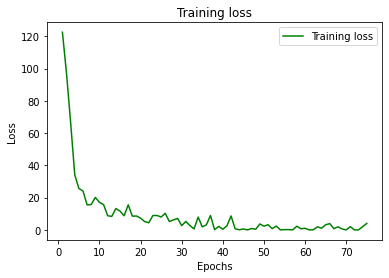

In [9]:
loss_train = loss_log
epochs=range(1,76)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Test the trained model
test_text = 'switch off the tv in livingroom'
doc = nlp(test_text)
print("Entities in '%s'" % test_text)
for ent in doc.ents:
    print(ent.label_, ent.text)

Entities in 'switch off the tv in livingroom'
B-action switch
B-state off
B-device tv
B-room livingroom


In [ ]:
if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()
    nlp.to_disk(output_dir)
    print("Saved model to", output_dir)

Saved model to /content/gdrive/MyDrive/Samsung-Prism
